<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
df = load_diabetes()

### Prepare input data

In [3]:
# insert code here
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
import pandas as pd

In [5]:
X = pd.DataFrame(df['data'], columns= df['feature_names'])
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
y = pd.DataFrame(df['target'], columns= ['target'])
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Split the data (training/test)

In [7]:
# insert code here


X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42)

### Create the model's architecture

In [8]:
# insert code here
model = Sequential()

### Compile the model

In [10]:
# insert code here
model.add(Dense(100, activation ='relu', input_shape = (X.shape[1], )))

model.add(Dense(50, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile( optimizer = 'sgd', loss = 'mse',
             metrics = ['mse'])

### Fit the training data

In [13]:
%%time
# insert code here

fit_model = model.fit(X_train, y_train, validation_split = 0.25, batch_size = 20 , epochs = 100, verbose = 1)

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 83824.5703 - mse: 83824.5703 - val_loss: 21893.8984 - val_mse: 21893.8984
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 22895.6875 - mse: 22895.6875 - val_loss: 14046.8867 - val_mse: 14046.8867
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 15707.5918 - mse: 15707.5928 - val_loss: 9970.5342 - val_mse: 9970.5342
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 11762.0029 - mse: 11762.0029 - val_loss: 7670.9980 - val_mse: 7670.9980
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 9373.8477 - mse: 9373.8477 - val_loss: 6513.9521 - val_mse: 6513.9531
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 8028.2744 - mse: 8028.2744 - val_loss: 5868.1250 - val_mse: 5868.1250
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 7144.0845 - mse: 7144.0845 - val_loss: 5648.9604 - val_m

Epoch 58/100
14/14 [==============================] - 0s 4ms/step - loss: 6177.2632 - mse: 6177.2632 - val_loss: 5877.7368 - val_mse: 5877.7368
Epoch 59/100
14/14 [==============================] - 0s 4ms/step - loss: 6173.0015 - mse: 6173.0015 - val_loss: 5880.8394 - val_mse: 5880.8394
Epoch 60/100
14/14 [==============================] - 0s 4ms/step - loss: 6176.3555 - mse: 6176.3550 - val_loss: 5864.7495 - val_mse: 5864.7495
Epoch 61/100
14/14 [==============================] - 0s 4ms/step - loss: 6177.9561 - mse: 6177.9561 - val_loss: 5877.2749 - val_mse: 5877.2749
Epoch 62/100
14/14 [==============================] - 0s 5ms/step - loss: 6176.9023 - mse: 6176.9023 - val_loss: 5911.3862 - val_mse: 5911.3862
Epoch 63/100
14/14 [==============================] - 0s 5ms/step - loss: 6173.0742 - mse: 6173.0742 - val_loss: 5887.0757 - val_mse: 5887.0757
Epoch 64/100
14/14 [==============================] - 0s 5ms/step - loss: 6176.2075 - mse: 6176.2075 - val_loss: 5871.1812 - val_mse: 58

### Create predictions

In [14]:
# insert code here
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis =1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

### Evaluate the model

In [15]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 100)
score


1/1 [==============================] - 0s 22ms/step - loss: 5469.4883 - mse: 5469.4883


[5469.48828125, 5469.48828125]

### Visualisation of cost

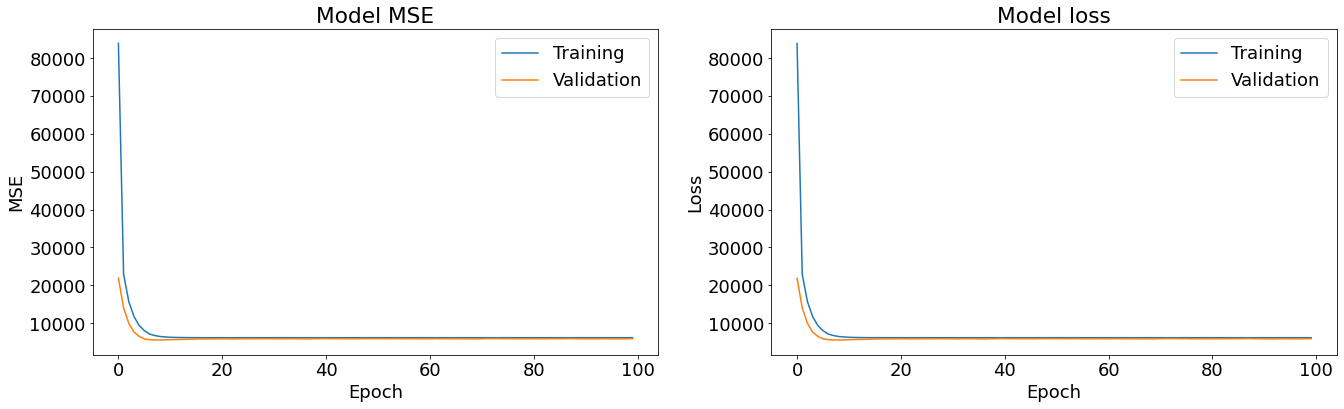

In [17]:
# insert code here

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fit_model.history['mse'], label = 'Training')
ax[0].plot(fit_model.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(fit_model.history['loss'], label = 'Training')
ax[1].plot(fit_model.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [ ]:
# insert code here
import seaborn as sns

residual = predictions - y_test

In [ ]:
def show_10_digits():
    fig, ax = plt.subplots(2, 5, figsize = (8, 4))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.3)
    fig.suptitle('Ten Predictions', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})
    
    ids = np.random.randint(len(predictions), size = 10)
    r = 0
    c = 0
    for id in ids:
        XTest = X_test[id].reshape(8, 8)

        # original image
        ax[r, c].imshow(XTest, cmap = 'gray')
        ax[r, c].set_title('Prediction: %d' % predictions[id])
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

In [ ]:
show_digit()

In [ ]:
show_10_digits()

© 2020 Institute of Data